### ✨ tensorflow 설치

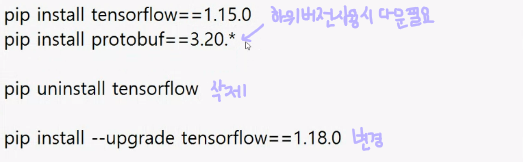

---

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.15.0'

<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">상수 노드 (Constant Node)</h2>

### EX 01)

####  1. 상수 노드 정의

In [14]:
a = tf.constant(1.0)
b = tf.constant(2.0)
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])

print(a)
print(a+b)
print(c)

# constant(): 상수를 만들때 쓰는 함수

Tensor("Const_6:0", shape=(), dtype=float32)
Tensor("add_11:0", shape=(), dtype=float32)
Tensor("Const_8:0", shape=(2, 2), dtype=float32)


#### 2. 세션(session)을 만들고 노드간의 텐서 연산 실행

In [16]:
# sess = tf.Session()
sess = tf.compat.v1.Session()   # 버전을 정의해서 실행할때,,

print("1:\n", sess.run([a, b]))
print("2:\n", sess.run(c))
print("3:\n", sess.run([a+b]))
print("4:\n", sess.run(c+1.0))   # broadcast수행

1:
 [1.0, 2.0]
2:
 [[1. 2.]
 [3. 4.]]
3:
 [3.0]
4:
 [[2. 3.]
 [4. 5.]]


#### 3. 세션 close

In [17]:
sess.close()

---
### Ex 02)

#### 1. TensorFlow 읽어들이기

In [7]:
import tensorflow as tf

#### 2. 상수 정의하기

In [8]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(4)

#### 3. 연산 정의하기

In [9]:
calc1_op = a + b * c
calc2_op = (a + b) * c

#### 4. 세션 시작하기

In [10]:
sess = tf.Session()

res1 = sess.run(calc1_op)
print(res1)

res2 = sess.run(calc2_op)
print(res2)

14
20


#### 5. 세션 close

In [11]:
sess.close()

<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">플레이스홀더 노드 (placeholder Node)</h2>

### Ex 01)

In [18]:
import tensorflow as tf

#### 1. 플레이스홀더 노드 정의

In [19]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = a + b

#### 2. 세션(session)을 만들고 플레이스홀더 노드를 통해 값을 입력받음

In [20]:
sess = tf.Session()

print(sess.run(c, feed_dict={a: 1.0, b:3.0}))
print(sess.run(c, feed_dict={a: [1.0, 2.0], b: [3.0, 4.0]}))

4.0
[4. 6.]


#### 3. 세션 close

In [21]:
sess.close()

---
### Ex 02)

In [22]:
import tensorflow as tf

#### 1. 플레이스홀더 정의

In [23]:
a = tf.placeholder(tf.int32, [3])
# a = tf.compat.v1.placehorder(tf.int32, [3])
# 버전형식때문에 경고가 출력되므로 붙여주는 것이 좋다.

# 정수 자료형 3개를 가진 배열

#### 2. 배열의 모든 값을 2배하는 연산 정의

In [24]:
b = tf.constant(2)
x2_op = a * b

#### 3. 세션 시작

In [25]:
sess = tf.Session()

#### 4. 플레이스홀더에 값을 넣고 실행

In [26]:
r1 = sess.run(x2_op, feed_dict={a: [1, 2, 3]})
print(r1)

r2 = sess.run(x2_op, feed_dict={a: [10, 20, 10]})
print(r2)

[2 4 6]
[20 40 20]


#### 5. 세션 close

In [27]:
sess.close()

<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">변수 노드 (Variable Node)</h2>

### Ex 01)

In [30]:
import tensorflow as tf

##### 값이 업데이트되는 변수 노드 정의

In [36]:
W1 = tf.Variable(tf.random.normal([1]))
b1 = tf.Variable(tf.random.normal([1]))
W2 = tf.Variable(tf.random.normal([1, 2]))
b2 = tf.Variable(tf.random.normal([1, 2]))

##### 세션 생성

In [37]:
sess = tf.compat.v1.Session()

##### 변수 노드 값 초기화. 변수 노드를 정의했다면, 반드시 필요✨
(변수에 대한 초기화는 정의할때 일어나는 것이 아니라 아래 초기화 문장을 만나야 실행이됨)

In [39]:
sess.run(tf.compat.v1.global_variables_initializer())

In [40]:
for step in range(3):
    W1 = W1 - step
    b1 = b1 - step
    W2 = W2 - step
    b2 = b2 - step
    
    print("step =", step, "/ W1 =", sess.run(W1), "/ b1 =", sess.run(b1))
    print("step =", step, "/ W2 =", sess.run(W2), "/ b2 =", sess.run(b2))    
    
sess.close()

step = 0 / W1 = [0.8090125] / b1 = [-0.45657346]
step = 0 / W2 = [[0.751594   0.06859751]] / b2 = [[-0.22558185  0.6326135 ]]
step = 1 / W1 = [-0.19098753] / b1 = [-1.4565735]
step = 1 / W2 = [[-0.248406  -0.9314025]] / b2 = [[-1.2255819  -0.36738652]]
step = 2 / W1 = [-2.1909876] / b1 = [-3.4565735]
step = 2 / W2 = [[-2.248406  -2.9314024]] / b2 = [[-3.225582  -2.3673866]]


---
### Ex 02)

In [43]:
import tensorflow as tf

# feeding 값 선언
input_data = [1, 2, 3, 4, 5]

# placeholder 변수 선언 
x = tf.compat.v1.placeholder(dtype=tf.float32)
W = tf.Variable([2], dtype=tf.float32)
y = W * x

sess = tf.compat.v1.Session()

# 변수 초기화 코드를 세션에 전달
sess.run(tf.compat.v1.global_variables_initializer())

# y그래프에 input_data를 feeding하면서 세선 실행
result = sess.run(y, feed_dict={x:input_data})
print(result)

# session close
sess.close()

[ 2.  4.  6.  8. 10.]


---
### Ex 03)

In [44]:
import tensorflow as tf

# 1. 상수 정의하기 - name을 이용해서 별칭 부여 가능
a = tf.constant(120)
b = tf.constant(130)
c = tf.constant(140)

# 2. 변수 정의하기 - 변수 v를 정의하고 초기치 0을 저장
v = tf.Variable(0)

# 3.데이터 플로우 그래프 정의하기
calc_op = a + b + c
assign_op = tf.compat.v1.assign(v, calc_op)

# 4. 세션 실행
sess = tf.compat.v1.Session()

sess.run(tf.compat.v1.global_variables_initializer())
sess.run(assign_op)

# v의 내뇽 출력
print(sess.run(v))
sess.close()

390


##### tf.global_variables_initializer()
메소드를 사용하여 세션에 초기화 연산을 수행해야하며, 변수에 메모리를 할당하고 초기값을 설정하는 역할을 한다.

---
### Ex 04) 머신러닝과 관련된 작업 내용

In [84]:
import pandas as pd
import numpy as np
import tensorflow as tf


#### 1. 키, 몸무게, 레이블이 적힌 CSV 파일 읽어들이기

In [85]:
csv = pd.read_csv("../3_Machine Learning/datasets/bmi.csv")
csv

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


#### 2. 데이터 정규화

In [86]:
csv['height'] = csv['height'] / 200
csv['weight'] = csv['weight'] / 100
csv.head()

,height,weight,label
0,0.710,0.62,fat
1,0.710,0.73,fat
2,0.885,0.61,normal
3,0.935,0.48,thin
4,0.765,0.60,fat


#### 3. 레이블을 배열로 변환

In [87]:
bclass = {"thin": [1, 0, 0], "normal": [0, 1, 0], "fat": [0, 0, 1]}
csv['label_pat'] = csv['label'].apply(lambda x: np.array(bclass[x]))
csv.head()

,height,weight,label,label_pat
0,0.710,0.62,fat,"[0, 0, 1]"
1,0.710,0.73,fat,"[0, 0, 1]"
2,0.885,0.61,normal,"[0, 1, 0]"
3,0.935,0.48,thin,"[1, 0, 0]"
4,0.765,0.60,fat,"[0, 0, 1]"


#### 4. 테스트를 위한 데이터 분류

In [88]:
test_csv = csv[15000:20000]
test_pat = test_csv[['weight', 'height']]
test_ans = list(test_csv['label_pat'])
test_ans

[array([0, 0, 1]),
 array([1, 0, 0]),
 array([0, 1, 0]),
 array([1, 0, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 0, 1]),
 array([1, 0, 0]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([1, 0, 0]),
 array([0, 1, 0]),
 array([1, 0, 0]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([1, 0, 0]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([0, 0, 1]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([0, 0, 1]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([1, 0, 0]),
 array([0, 1, 0]),
 array([0, 0, 1]),
 array([1, 0, 0]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 0, 1]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([0, 1, 0]),
 array([1, 0, 0]),
 array([1, 0, 0]),
 array([1, 0

#### 5. 플레이스홀더 선언

In [89]:
x = tf.placeholder(tf.float32, [None, 2])    # 학습데이터
y_ = tf.placeholder(tf.float32, [None, 3])   # 정답데이터

# 행 크기를 정확히 알 수 없을 때 None 사용

#### 6. 변수 선언하기

In [90]:
W = tf.Variable(tf.zeros([2, 3]))   # 가중치
b = tf.Variable(tf.zeros([3]))      # 바이어스(편차)

#### 7. 소프트맥스 회귀 정의하기

In [91]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

# matmul(): 행렬 곱셈 수행
# softmax(): 다중 분류에 사용되는 함수 (cf. 이중 분류에서는 sigmoid() 사용)

##### ex) iris 데이터로 소프트맥스를 사용했을때

각 데이터 클래스를 가지고 확률을 만들어내는 함수
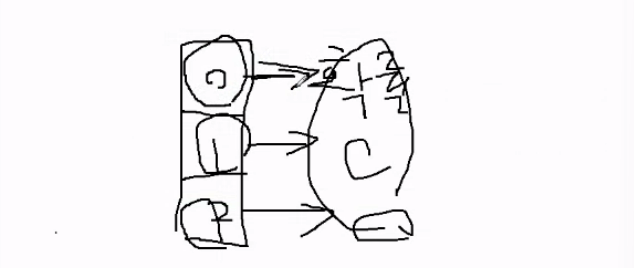

#### 8. 모델 훈련하기

In [92]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
optimizer = tf.train.GradientDescentOptimizer(0.01)   # w와 b를 자동으로 설정
train = optimizer.minimize(cross_entropy)

# cross_entropy => 손실값을 계산 한 값을 저장해줌
# y: 계산값
# y_: 실제값
# 손실값 => 분류: cross entropy / 회귀: mse
# 손실값을 최소화할 수 있는 값을 구해 train에 저장

##### GradientDescentOptimizer()
경사하강법으로 손실 함수를 최소화하는 모델 파라미터를 찾기 위해 사용
(0.01은 학습률을 의미)

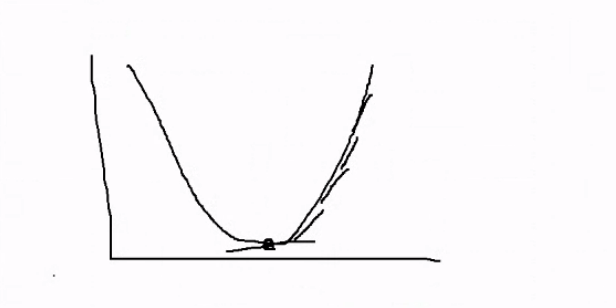

#### 9. 정답률 구하기

In [93]:
predict = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))

# 1은 축방향을 의미
# argmax(): 가장 큰 값의 위치를 구함
# 예측값을 가지고 평균을 구함 => 정확도

#### 10.세션 시작하기

In [94]:
sess = tf.compat.v1.Session()
sess.run(tf.global_variables_initializer())

#### 11. 학습시키기

In [95]:
for step in range(15000):
    i = (step * 100) % 15000
    rows = csv[1 + i : 1 + i + 100]
    x_pat = rows[['weight', 'height']]
    y_ans = list(rows['label_pat'])
    fd = {x: x_pat, y_: y_ans}
    sess.run(train, feed_dict=fd)
    
    if step % 500 == 0:   # step이 500의 배수일때 출력
        cre = sess.run(cross_entropy, feed_dict=fd)
        acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
        print("step =", step, "| cre =", cre, "| acc =", acc)
        
        
# 15000건의 데이터가 있으면 한 번에 학습을 시키지 않음.
# 이를 100개씩 쪼개어 학습을 시키며 이를 반복하며, 반복1번을 1epoch라고 한다?

step = 0 | cre = 1.098595 | acc = 0.3242
step = 500 | cre = 1.0949001 | acc = 0.3684
step = 1000 | cre = 1.0968362 | acc = 0.3684
step = 1500 | cre = 1.0890875 | acc = 0.3684
step = 2000 | cre = 1.0854574 | acc = 0.3684
step = 2500 | cre = 1.0907798 | acc = 0.3684
step = 3000 | cre = 1.0794799 | acc = 0.3772
step = 3500 | cre = 1.0763575 | acc = 0.4024
step = 4000 | cre = 1.082489 | acc = 0.433
step = 4500 | cre = 1.0693377 | acc = 0.4796
step = 5000 | cre = 1.0670123 | acc = 0.5142
step = 5500 | cre = 1.0734547 | acc = 0.5468
step = 6000 | cre = 1.058941 | acc = 0.5828
step = 6500 | cre = 1.0574982 | acc = 0.6054
step = 7000 | cre = 1.064285 | acc = 0.6246
step = 7500 | cre = 1.0485251 | acc = 0.6442
step = 8000 | cre = 1.0479634 | acc = 0.6528
step = 8500 | cre = 1.0552124 | acc = 0.659
step = 9000 | cre = 1.038259 | acc = 0.6674
step = 9500 | cre = 1.0385478 | acc = 0.6726
step = 10000 | cre = 1.0463612 | acc = 0.6774
step = 10500 | cre = 1.0282755 | acc = 0.6812
step = 11000 | cre 

#### 12. 최종적인 정답률 구하기

In [96]:
acc = sess.run(accuracy, feed_dict={x: test_pat, y_: test_ans})
print("정답률 =", acc)

정답률 = 0.6906


#### 13. 세션 close

In [97]:
sess.close()